### Using Spotipy to extract my Spotify listening data and analysis the trend of some important features the data provides

In [1]:
# importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spotipy
from pandas.io.json import json_normalize

import warnings
warnings.filterwarnings('ignore')

In [2]:
# giving in the details to use the API
username= 'bx1j9iim2qv6chih9x8lpiwd8'
scope = 'user-library-read user-top-read'
client_id = 'ecaebe64a9b549aebb5feaad570baefd'
client_secret = '9a301fe1b36c4688a789f2a01ea792a4'
redirect_uri = 'http://localhost/callback'

authentication = spotipy.util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)

Couldn't read cache at: .cache-bx1j9iim2qv6chih9x8lpiwd8
Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to: http://localhost/callback?code=AQD6oLvNUR1_E3YbsMJW2A8S7g9zVLuZAfLHmv_eFkE-y8tV5Ms8aXPQ_tOORYByFU21qt2f4qG8-KRyWPw3uCa0Ny-r9lqj7EIJn_dLoQMfonfSshZmk0C8mqooDuBaiTQwPkvFQKiqRyrALEx2g_SfMFtUU4_r_imlzaSJz8QyWB7olbANv7WZfhIy8i-VjU10JpAhQTCHw1j7WkdQ


Couldn't read cache at: .cache-bx1j9iim2qv6chih9x8lpiwd8


In [3]:
s = spotipy.Spotify(auth=authentication)

### My top listening artists on Spotify

In [4]:
# getting top artists from my short term, medium term and long term listening history!
short_term_artists = s.current_user_top_artists(limit=50, offset=0, time_range='short_term')
medium_term_artists = s.current_user_top_artists(limit=50, offset=0, time_range='medium_term')
long_term_artists = s.current_user_top_artists(limit=50, offset=0, time_range='long_term')

In [5]:
# normalizing semi-structured JSON data into flat table
short_term_top_artists = json_normalize(short_term_artists["items"])
medium_term_top_artists = json_normalize(medium_term_artists["items"])
long_term_top_artists = json_normalize(long_term_artists["items"])

In [6]:
# let's look how the dataset is - 
short_term_top_artists.head()

,genres,href,id,images,name,popularity,type,uri,external_urls.spotify,followers.href,followers.total
0,"[hip hop, rap]",https://api.spotify.com/v1/artists/4V8LLVI7Pba...,4V8LLVI7PbaPR0K2TGSxFF,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Tyler, The Creator",86,artist,spotify:artist:4V8LLVI7PbaPR0K2TGSxFF,https://open.spotify.com/artist/4V8LLVI7PbaPR0...,None,5777417
1,"[album rock, birmingham metal, classic rock, h...",https://api.spotify.com/v1/artists/5M52tdBnJaK...,5M52tdBnJaKSvOpJGz8mfZ,"[{'height': 1333, 'url': 'https://i.scdn.co/im...",Black Sabbath,76,artist,spotify:artist:5M52tdBnJaKSvOpJGz8mfZ,https://open.spotify.com/artist/5M52tdBnJaKSvO...,None,5097162
2,"[black metal, death metal, metal, pagan black ...",https://api.spotify.com/v1/artists/1MK0sGeyTNk...,1MK0sGeyTNkbefYGj673e9,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Behemoth,56,artist,spotify:artist:1MK0sGeyTNkbefYGj673e9,https://open.spotify.com/artist/1MK0sGeyTNkbef...,None,396685
3,"[dark trap, drill, hip hop, miami hip hop, rap...",https://api.spotify.com/v1/artists/6fxyWrfmjcb...,6fxyWrfmjcbj5d12gXeiNV,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Denzel Curry,76,artist,spotify:artist:6fxyWrfmjcbj5d12gXeiNV,https://open.spotify.com/artist/6fxyWrfmjcbj5d...,None,1501082
4,"[bow pop, compositional ambient, icelandic cla...",https://api.spotify.com/v1/artists/7E3BRXV9ZbC...,7E3BRXV9ZbCt5lQTCXMTia,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Ólafur Arnalds,71,artist,spotify:artist:7E3BRXV9ZbCt5lQTCXMTia,https://open.spotify.com/artist/7E3BRXV9ZbCt5l...,None,563672


In [7]:
# keeping only the interesting columns!
short_term_top_artists = short_term_top_artists[['name','popularity','genres', 'followers.total']]
medium_term_top_artists = medium_term_top_artists[['name','popularity','genres', 'followers.total']]
long_term_top_artists = long_term_top_artists[['name','popularity','genres', 'followers.total']]

### Top artists on short term time range

In [8]:
# now - let's look again - 
short_term_top_artists.head(10)

,name,popularity,genres,followers.total
0,"Tyler, The Creator",86,"[hip hop, rap]",5777417
1,Black Sabbath,76,"[album rock, birmingham metal, classic rock, h...",5097162
2,Behemoth,56,"[black metal, death metal, metal, pagan black ...",396685
3,Denzel Curry,76,"[dark trap, drill, hip hop, miami hip hop, rap...",1501082
4,Ólafur Arnalds,71,"[bow pop, compositional ambient, icelandic cla...",563672
5,Entombed,46,"[alternative metal, black metal, death 'n' rol...",130814
6,Papithbk,64,"[australian trap, emo rap, sad rap]",89617
7,The Beatles,89,"[beatlesque, british invasion, classic rock, m...",18587723
8,Nirvana,84,"[alternative rock, grunge, permanent wave, rock]",12035115
9,Travis Scott,95,"[rap, slap house]",15003181


### Top artists on medium term time range

In [9]:
medium_term_top_artists.head(10)

,name,popularity,genres,followers.total
0,Eminem,94,"[detroit hip hop, hip hop, rap]",41436243
1,"Tyler, The Creator",86,"[hip hop, rap]",5777417
2,Black Sabbath,76,"[album rock, birmingham metal, classic rock, h...",5097162
3,BROCKHAMPTON,77,"[boy band, hip hop, rap]",1692571
4,Megadeth,72,"[album rock, alternative metal, hard rock, mel...",3140472
5,Powfu,81,[sad rap],777647
6,Cannibal Corpse,57,"[alternative metal, brutal death metal, buffal...",462987
7,King Crimson,60,"[album rock, art rock, classic rock, instrumen...",624576
8,J. Cole,88,"[conscious hip hop, hip hop, north carolina hi...",12541257
9,NF,85,"[hip hop, pop rap, rap]",4860619


### Top artists on long term time range

In [10]:
long_term_top_artists.head(10)

,name,popularity,genres,followers.total
0,Eminem,94,"[detroit hip hop, hip hop, rap]",41436243
1,Black Sabbath,76,"[album rock, birmingham metal, classic rock, h...",5097162
2,BROCKHAMPTON,77,"[boy band, hip hop, rap]",1692571
3,J. Cole,88,"[conscious hip hop, hip hop, north carolina hi...",12541257
4,XXXTENTACION,93,"[emo rap, miami hip hop]",25041008
5,2Pac,82,"[g funk, gangster rap, hip hop, rap, west coas...",9848883
6,NF,85,"[hip hop, pop rap, rap]",4860619
7,Snoop Dogg,86,"[g funk, gangster rap, hip hop, pop rap, rap, ...",6587539
8,The Beatles,89,"[beatlesque, british invasion, classic rock, m...",18587723
9,Dr. Dre,82,"[g funk, gangster rap, hip hop, rap, west coas...",5420023


### Observations:

- It is very clear that Eminem is always number one on my top listening artists!
- It is also visible that I'm more into 'Brockhampton' and 'Ozzy Osbourne' recently(a.k.a short term)!
- There is an artist names 'eevee' in my short term top artists - and the genre is chillhop beats/ lofi-beats. This is because - I am binging some lofi beats while studying and coding - lol! And "**eevee**" is really a cool lofi artist :)

### My top tracks on Spotify listening history

In [11]:
# setting sample size and offset
# offset - the index of the first album to return
# sample size for limit - the number of items to return
SAMPLE_SIZE = 1000
OFFSET = 0

In [12]:
# getting top tracks from my short term, medium term and long term listening history!
short_term_tracks = s.current_user_top_tracks(limit=SAMPLE_SIZE, offset=OFFSET, time_range='short_term')
medium_term_tracks = s.current_user_top_tracks(limit=SAMPLE_SIZE, offset=OFFSET, time_range='medium_term')
long_term_tracks = s.current_user_top_tracks(limit=SAMPLE_SIZE, offset=OFFSET, time_range='long_term')

In [13]:
# normalizing semi-structured JSON data into flat table
short_term_top_tracks = json_normalize(short_term_tracks["items"])
medium_term_top_tracks = json_normalize(medium_term_tracks["items"])
long_term_top_tracks = json_normalize(long_term_tracks["items"])

In [14]:
short_term_top_tracks.head(2)

,artists,available_markets,disc_number,duration_ms,explicit,href,id,is_local,name,popularity,...,album.id,album.images,album.name,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,external_ids.isrc,external_urls.spotify
0,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,195320,True,https://api.spotify.com/v1/tracks/0fv2KH6hac06...,0fv2KH6hac06J86hBUTcSf,False,NEW MAGIC WAND,67,...,5zi7WsKlIiUXv09tbGLKsE,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",IGOR,2019-05-17,day,12,album,spotify:album:5zi7WsKlIiUXv09tbGLKsE,USQX91901115,https://open.spotify.com/track/0fv2KH6hac06J86...
1,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,147866,True,https://api.spotify.com/v1/tracks/2QbGvQssb0VL...,2QbGvQssb0VLLS4x5NOmyJ,False,RICKY,67,...,6PkSBdx19zarn4ae1D08gA,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",ZUU,2019-05-31,day,12,album,spotify:album:6PkSBdx19zarn4ae1D08gA,USC4R1902692,https://open.spotify.com/track/2QbGvQssb0VLLS4...


In [15]:
# selecting only interesting columns
short_term_top_tracks = short_term_top_tracks[['name', 'artists', 'popularity', 'duration_ms', 'album.name', 'album.release_date','id']]
medium_term_top_tracks = medium_term_top_tracks[['name', 'artists', 'popularity',  'duration_ms', 'album.name', 'album.release_date','id']]
long_term_top_tracks = long_term_top_tracks[['name', 'artists', 'popularity', 'duration_ms', 'album.name', 'album.release_date','id']]

In [16]:
short_term_top_tracks.head(10)

,name,artists,popularity,duration_ms,album.name,album.release_date,id
0,NEW MAGIC WAND,[{'external_urls': {'spotify': 'https://open.s...,67,195320,IGOR,2019-05-17,0fv2KH6hac06J86hBUTcSf
1,RICKY,[{'external_urls': {'spotify': 'https://open.s...,67,147866,ZUU,2019-05-31,2QbGvQssb0VLLS4x5NOmyJ
2,I THINK,[{'external_urls': {'spotify': 'https://open.s...,70,212013,IGOR,2019-05-17,4f8Mh5wuWHOsfXtzjrJB3t
3,EARFQUAKE,[{'external_urls': {'spotify': 'https://open.s...,79,190066,IGOR,2019-05-17,5hVghJ4KaYES3BFUATCYn0
4,TKN (feat. Travis Scott),[{'external_urls': {'spotify': 'https://open.s...,80,129370,TKN (feat. Travis Scott),2020-05-28,4w47S36wQGBhGg073q3nt7
5,Dead Eyes,[{'external_urls': {'spotify': 'https://open.s...,70,219428,Dead Eyes,2019-11-08,7BdlyzVvOqmwPH9dYtZfsx
6,Blow Your Trumpets Gabriel,[{'external_urls': {'spotify': 'https://open.s...,44,265440,The Satanist,2014-02-04,4JynkH6Oa9cJ0zUTzYA2UP
7,Chinese Twilight,[{'external_urls': {'spotify': 'https://open.s...,35,300240,Symphonies of Wellness,2006-01-01,1XR1DREXWoLvH5at3T9KCg
8,Ultimate,[{'external_urls': {'spotify': 'https://open.s...,65,189974,Ultimate,2015-01-01,6R0GRYk2vs2XuBVemYK5YZ
9,Memento Mori,[{'external_urls': {'spotify': 'https://open.s...,57,348099,Lamb of God,2020-06-19,5I29F9GR0OkaU1nuxp9hU8


In [17]:
# uh - oh, the artist column is not perfect
# let's look into any value from that column
short_term_top_tracks['artists'][0]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/4V8LLVI7PbaPR0K2TGSxFF'},
  'href': 'https://api.spotify.com/v1/artists/4V8LLVI7PbaPR0K2TGSxFF',
  'id': '4V8LLVI7PbaPR0K2TGSxFF',
  'name': 'Tyler, The Creator',
  'type': 'artist',
  'uri': 'spotify:artist:4V8LLVI7PbaPR0K2TGSxFF'}]

In [18]:
# so the artists column is a dictionary with many other details
# but since - I only need artist name - I am only selecting the name 
getName = lambda raw_col_value: raw_col_value[0]['name']

short_term_top_tracks['artists'] = short_term_top_tracks['artists'].apply(getName)
medium_term_top_tracks['artists'] = medium_term_top_tracks['artists'].apply(getName)
long_term_top_tracks['artists'] = long_term_top_tracks['artists'].apply(getName)

In [19]:
short_term_top_tracks.head(10)

,name,artists,popularity,duration_ms,album.name,album.release_date,id
0,NEW MAGIC WAND,"Tyler, The Creator",67,195320,IGOR,2019-05-17,0fv2KH6hac06J86hBUTcSf
1,RICKY,Denzel Curry,67,147866,ZUU,2019-05-31,2QbGvQssb0VLLS4x5NOmyJ
2,I THINK,"Tyler, The Creator",70,212013,IGOR,2019-05-17,4f8Mh5wuWHOsfXtzjrJB3t
3,EARFQUAKE,"Tyler, The Creator",79,190066,IGOR,2019-05-17,5hVghJ4KaYES3BFUATCYn0
4,TKN (feat. Travis Scott),ROSALÍA,80,129370,TKN (feat. Travis Scott),2020-05-28,4w47S36wQGBhGg073q3nt7
5,Dead Eyes,Promoting Sounds,70,219428,Dead Eyes,2019-11-08,7BdlyzVvOqmwPH9dYtZfsx
6,Blow Your Trumpets Gabriel,Behemoth,44,265440,The Satanist,2014-02-04,4JynkH6Oa9cJ0zUTzYA2UP
7,Chinese Twilight,Klaus Schønning,35,300240,Symphonies of Wellness,2006-01-01,1XR1DREXWoLvH5at3T9KCg
8,Ultimate,Denzel Curry,65,189974,Ultimate,2015-01-01,6R0GRYk2vs2XuBVemYK5YZ
9,Memento Mori,Lamb of God,57,348099,Lamb of God,2020-06-19,5I29F9GR0OkaU1nuxp9hU8


In [20]:
medium_term_top_tracks.head(10)

,name,artists,popularity,duration_ms,album.name,album.release_date,id
0,God Is Dead?,Black Sabbath,53,532266,13,2013-01-01,3IKJNHnVZ2bXGjAFBJiUYo
1,SWEET,BROCKHAMPTON,64,274274,SATURATION II,2017-08-25,2DgMxFMUQRPthW4ROhjen1
2,The Message,Nas,63,234093,It Was Written,1996-07-02,1AHfovSnGPVYKaahRtA0U6
3,Symphony Of Destruction - Remastered 2012,Megadeth,36,248386,Warheads On Foreheads,2019-03-22,4oD5mPWqvZe2ad4OlG9zwk
4,NEW MAGIC WAND,"Tyler, The Creator",67,195320,IGOR,2019-05-17,0fv2KH6hac06J86hBUTcSf
5,TKN (feat. Travis Scott),ROSALÍA,80,129370,TKN (feat. Travis Scott),2020-05-28,4w47S36wQGBhGg073q3nt7
6,Daisy,Ashnikko,84,146523,Daisy,2020-07-09,0AUvWawuP0ibk4SQ3sIZjk
7,EARFQUAKE,"Tyler, The Creator",79,190066,IGOR,2019-05-17,5hVghJ4KaYES3BFUATCYn0
8,Holy Wars...The Punishment Due - Remastered 2004,Megadeth,64,392600,Rust In Peace,1990-10-04,5LyRtsQLhcXmy50VXhQXXS
9,She's Always a Woman,Billy Joel,70,201373,The Stranger (Legacy Edition),1977,5RgFlk1fcClZd0Y4SGYhqH


In [21]:
long_term_top_tracks.head(10)

,name,artists,popularity,duration_ms,album.name,album.release_date,id
0,Godzilla (feat. Juice WRLD),Eminem,84,210800,Music To Be Murdered By,2020-01-17,7FIWs0pqAYbP91WWM0vlTQ
1,God Is Dead?,Black Sabbath,53,532266,13,2013-01-01,3IKJNHnVZ2bXGjAFBJiUYo
2,Insane,Eminem,51,181360,Relapse: Refill,2009-05-15,6x1stxDsnh4ZlEft29uhlR
3,Will - Remix,Joyner Lucas,66,164475,Will (Remix),2020-05-15,6WI33r2QRxyxttn3KH0XkC
4,Chop Suey!,System Of A Down,78,210240,Toxicity,2001-09-04,2DlHlPMa4M17kufBvI2lEN
5,"Nuthin' But A ""G"" Thang",Dr. Dre,72,238466,The Chronic,1992-12-15,4YtoipFgf4k0AfD17ZfD5X
6,COFFIN (feat. Eminem),Jessie Reyez,61,261773,BEFORE LOVE CAME TO KILL US,2020-03-27,4HqPiUgeE9z0MHLXkgUQkQ
7,death bed (coffee for your head),Powfu,87,173333,death bed (coffee for your head),2020-02-08,7eJMfftS33KTjuF7lTsMCx
8,She's Always a Woman,Billy Joel,70,201373,The Stranger (Legacy Edition),1977,5RgFlk1fcClZd0Y4SGYhqH
9,Snowman,WYS,64,195136,1 Am. Study Session,2019-12-08,5ehVOwEZ1Q7Ckkdtq0dY1W


### We can also extarct all the playlist that a user has created using the spotipy!

In [22]:
usr_playlists = s.current_user_playlists(limit=50, offset=0)

In [23]:
usr_playlists = json_normalize(usr_playlists["items"])

In [24]:
usr_playlists.head()

,collaborative,description,href,id,images,name,primary_color,public,snapshot_id,type,uri,external_urls.spotify,owner.display_name,owner.external_urls.spotify,owner.href,owner.id,owner.type,owner.uri,tracks.href,tracks.total
0,False,Coding &#x2F; Working,https://api.spotify.com/v1/playlists/4odiPsnUM...,4odiPsnUMUdaoEdrKqwVCj,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",Instrumental Metal (no Lyrics),None,True,OCwyOGJkNTcyNjhjNWI2YjliZjJkZTcwYjcyNTEyODMwNj...,playlist,spotify:playlist:4odiPsnUMUdaoEdrKqwVCj,https://open.spotify.com/playlist/4odiPsnUMUda...,Jithendra,https://open.spotify.com/user/bx1j9iim2qv6chih...,https://api.spotify.com/v1/users/bx1j9iim2qv6c...,bx1j9iim2qv6chih9x8lpiwd8,user,spotify:user:bx1j9iim2qv6chih9x8lpiwd8,https://api.spotify.com/v1/playlists/4odiPsnUM...,34
1,False,,https://api.spotify.com/v1/playlists/6bbWniA3H...,6bbWniA3HJOWggfUnY7rQ6,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",2020,None,True,ODQsM2YxMGFkNmFkMmMyZDQ0ZTZlMWFjYmEzMmE0YTE1ZD...,playlist,spotify:playlist:6bbWniA3HJOWggfUnY7rQ6,https://open.spotify.com/playlist/6bbWniA3HJOW...,Jithendra,https://open.spotify.com/user/bx1j9iim2qv6chih...,https://api.spotify.com/v1/users/bx1j9iim2qv6c...,bx1j9iim2qv6chih9x8lpiwd8,user,spotify:user:bx1j9iim2qv6chih9x8lpiwd8,https://api.spotify.com/v1/playlists/6bbWniA3H...,70
2,False,,https://api.spotify.com/v1/playlists/559c2JYzG...,559c2JYzGaEOcM8jJJmmwQ,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",having a good day :),None,True,NDIsMzFhNTZmNzE5YTJmZjkyYTBlZTE5ZDUwYTkwY2RmOG...,playlist,spotify:playlist:559c2JYzGaEOcM8jJJmmwQ,https://open.spotify.com/playlist/559c2JYzGaEO...,Jithendra,https://open.spotify.com/user/bx1j9iim2qv6chih...,https://api.spotify.com/v1/users/bx1j9iim2qv6c...,bx1j9iim2qv6chih9x8lpiwd8,user,spotify:user:bx1j9iim2qv6chih9x8lpiwd8,https://api.spotify.com/v1/playlists/559c2JYzG...,42
3,False,,https://api.spotify.com/v1/playlists/5VPmjnF9m...,5VPmjnF9mIihpK4HocdD9Q,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",Symphonic / Orchestral Death Metal,None,True,NixiNjRlZTQ5MjQ3ZWRlNDAxODU0NzA4YjM0NzBjNjU1ND...,playlist,spotify:playlist:5VPmjnF9mIihpK4HocdD9Q,https://open.spotify.com/playlist/5VPmjnF9mIih...,Jithendra,https://open.spotify.com/user/bx1j9iim2qv6chih...,https://api.spotify.com/v1/users/bx1j9iim2qv6c...,bx1j9iim2qv6chih9x8lpiwd8,user,spotify:user:bx1j9iim2qv6chih9x8lpiwd8,https://api.spotify.com/v1/playlists/5VPmjnF9m...,4
4,False,,https://api.spotify.com/v1/playlists/5ieBdheZM...,5ieBdheZMQ7pmQW463deHo,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",Symphonic Black Metal,None,True,MTAsNDg5NzY4MWI1OTE2YTQzOWRhYWZlYzUxOTRjOWYzOD...,playlist,spotify:playlist:5ieBdheZMQ7pmQW463deHo,https://open.spotify.com/playlist/5ieBdheZMQ7p...,Jithendra,https://open.spotify.com/user/bx1j9iim2qv6chih...,https://api.spotify.com/v1/users/bx1j9iim2qv6c...,bx1j9iim2qv6chih9x8lpiwd8,user,spotify:user:bx1j9iim2qv6chih9x8lpiwd8,https://api.spotify.com/v1/playlists/5ieBdheZM...,15


### We can get the saved songs/ liked songs of a user!

In [25]:
saved_songs = s.current_user_saved_tracks(limit=50, offset=0)
saved = json_normalize(saved_songs["items"])
saved.tail()

,added_at,track.album.album_type,track.album.artists,track.album.available_markets,track.album.external_urls.spotify,track.album.href,track.album.id,track.album.images,track.album.name,track.album.release_date,...,track.external_urls.spotify,track.href,track.id,track.is_local,track.name,track.popularity,track.preview_url,track.track_number,track.type,track.uri
45,2020-11-16T16:52:50Z,single,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",https://open.spotify.com/album/0VcbEnVaIMuWuw2...,https://api.spotify.com/v1/albums/0VcbEnVaIMuW...,0VcbEnVaIMuWuw2hSCso4i,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",PAID MY DUES,2019-12-03,...,https://open.spotify.com/track/18czZN7uruOjftj...,https://api.spotify.com/v1/tracks/18czZN7uruOj...,18czZN7uruOjftj71Kt8oj,False,PAID MY DUES,69,None,1,track,spotify:track:18czZN7uruOjftj71Kt8oj
46,2020-11-16T06:54:48Z,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",https://open.spotify.com/album/42MQxlJENU0xJOR...,https://api.spotify.com/v1/albums/42MQxlJENU0x...,42MQxlJENU0xJORW7byNNS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",BEFORE LOVE CAME TO KILL US,2020-03-27,...,https://open.spotify.com/track/4HqPiUgeE9z0MHL...,https://api.spotify.com/v1/tracks/4HqPiUgeE9z0...,4HqPiUgeE9z0MHLXkgUQkQ,False,COFFIN (feat. Eminem),61,None,4,track,spotify:track:4HqPiUgeE9z0MHLXkgUQkQ
47,2020-11-16T04:12:33Z,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",https://open.spotify.com/album/7zg9ZSOQtYLjWnv...,https://api.spotify.com/v1/albums/7zg9ZSOQtYLj...,7zg9ZSOQtYLjWnvSawflg6,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Born Again,1999,...,https://open.spotify.com/track/1YQ7BbJR8HqAolf...,https://api.spotify.com/v1/tracks/1YQ7BbJR8HqA...,1YQ7BbJR8HqAolfprvxGKu,False,Notorious B.I.G. (feat. Lil' Kim & Puff Daddy)...,55,https://p.scdn.co/mp3-preview/5eaf02242ade1040...,2,track,spotify:track:1YQ7BbJR8HqAolfprvxGKu
48,2020-11-16T04:08:52Z,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",https://open.spotify.com/album/1KOmHyNLuOe5YrP...,https://api.spotify.com/v1/albums/1KOmHyNLuOe5...,1KOmHyNLuOe5YrPhD3Juuf,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Perception,2017-10-06,...,https://open.spotify.com/track/07FkzikE6FuHIa8...,https://api.spotify.com/v1/tracks/07FkzikE6FuH...,07FkzikE6FuHIa8Ma7zJGc,False,Lie,77,None,13,track,spotify:track:07FkzikE6FuHIa8Ma7zJGc
49,2020-11-16T04:03:17Z,single,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",https://open.spotify.com/album/2nnueqFhVFxG1Wd...,https://api.spotify.com/v1/albums/2nnueqFhVFxG...,2nnueqFhVFxG1WdytmnXqE,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",When I Grow Up,2019-06-27,...,https://open.spotify.com/track/0hWzB4dR1zwcokP...,https://api.spotify.com/v1/tracks/0hWzB4dR1zwc...,0hWzB4dR1zwcokPvccww0k,False,When I Grow Up,65,None,1,track,spotify:track:0hWzB4dR1zwcokPvccww0k


In [26]:
saved = saved[['track.name', 'track.album.name', 'track.popularity', 'track.album.artists','track.id']]
saved.head()

,track.name,track.album.name,track.popularity,track.album.artists,track.id
0,I THINK,IGOR,70,[{'external_urls': {'spotify': 'https://open.s...,4f8Mh5wuWHOsfXtzjrJB3t
1,My Band,D-12 World,68,[{'external_urls': {'spotify': 'https://open.s...,4XHQyvbrBsQaaBUW1VvmsL
2,Secret Senshi,Memory Tape,48,[{'external_urls': {'spotify': 'https://open.s...,7MasAsBwXnp9V7mC4AxCM0
3,everybody dies,everybody dies,59,[{'external_urls': {'spotify': 'https://open.s...,1wIQtB3UQ1TfjNMZZqO6eh
4,Ghosts 'n' Stuff (feat. Rob Swire) - Nero Mix,5 Years of mau5,0,[{'external_urls': {'spotify': 'https://open.s...,1s9STUhHrHQQvteXZrDCtV


In [27]:
getName = lambda raw_col_value: raw_col_value[0]['name']

saved['track.album.artists'] = saved['track.album.artists'].apply(getName)
saved.tail()

,track.name,track.album.name,track.popularity,track.album.artists,track.id
45,PAID MY DUES,PAID MY DUES,69,NF,18czZN7uruOjftj71Kt8oj
46,COFFIN (feat. Eminem),BEFORE LOVE CAME TO KILL US,61,Jessie Reyez,4HqPiUgeE9z0MHLXkgUQkQ
47,Notorious B.I.G. (feat. Lil' Kim & Puff Daddy)...,Born Again,55,The Notorious B.I.G.,1YQ7BbJR8HqAolfprvxGKu
48,Lie,Perception,77,NF,07FkzikE6FuHIa8Ma7zJGc
49,When I Grow Up,When I Grow Up,65,NF,0hWzB4dR1zwcokPvccww0k


### We can even get the details of a particular playlist created by the user

In [28]:
my_playlist = s.playlist_tracks('6wECDCxYAWgA3Cj4OP82xk', fields=None, limit=100, offset=0, market=None, additional_types=('track', ))

In [29]:
my_playlist = json_normalize(my_playlist["items"])

In [30]:
my_playlist.shape

(60, 40)

In [31]:
long_term_top_tracks.head(10)

,name,artists,popularity,duration_ms,album.name,album.release_date,id
0,Godzilla (feat. Juice WRLD),Eminem,84,210800,Music To Be Murdered By,2020-01-17,7FIWs0pqAYbP91WWM0vlTQ
1,God Is Dead?,Black Sabbath,53,532266,13,2013-01-01,3IKJNHnVZ2bXGjAFBJiUYo
2,Insane,Eminem,51,181360,Relapse: Refill,2009-05-15,6x1stxDsnh4ZlEft29uhlR
3,Will - Remix,Joyner Lucas,66,164475,Will (Remix),2020-05-15,6WI33r2QRxyxttn3KH0XkC
4,Chop Suey!,System Of A Down,78,210240,Toxicity,2001-09-04,2DlHlPMa4M17kufBvI2lEN
5,"Nuthin' But A ""G"" Thang",Dr. Dre,72,238466,The Chronic,1992-12-15,4YtoipFgf4k0AfD17ZfD5X
6,COFFIN (feat. Eminem),Jessie Reyez,61,261773,BEFORE LOVE CAME TO KILL US,2020-03-27,4HqPiUgeE9z0MHLXkgUQkQ
7,death bed (coffee for your head),Powfu,87,173333,death bed (coffee for your head),2020-02-08,7eJMfftS33KTjuF7lTsMCx
8,She's Always a Woman,Billy Joel,70,201373,The Stranger (Legacy Edition),1977,5RgFlk1fcClZd0Y4SGYhqH
9,Snowman,WYS,64,195136,1 Am. Study Session,2019-12-08,5ehVOwEZ1Q7Ckkdtq0dY1W


### Extracting useful song features (other than basic details like name/artist)

- Here I am collecting some important sing details that spotify provides for my top tracks for each time frame!
- My goal is here is to see how those features vary over over time!

In [32]:
trends_set = [
    { 'ref': long_term_top_tracks,   'term': 'Long'},
    { 'ref': medium_term_top_tracks, 'term': 'Medium' },
    { 'ref': short_term_top_tracks,  'term': 'Short'  }
]

trend_loudness = {}
trend_tempo = {}
trend_mode = {}
trend_danceability = {}
trend_energy = {}
trend_speechiness = {}
trend_acousticness = {}
trend_instrumentalness = {}
trend_liveness = {}
trend_valence = {}

In [33]:
for df_item in trends_set:
    dict_data = df_item['ref'].to_dict(orient='index')
    track_popularity = {v['id']: v['popularity'] for k,v in dict_data.items()}

    try:
        tracks_list_features = s.audio_features(track_popularity.keys())
    except:
        print("Couldn't get Track Features Analytics")
        continue
        tracks_list_features
    track_details = None        
    collect_column_name = True
    for a in tracks_list_features:
        a['popularity'] = track_popularity[a['id']]
        
        if collect_column_name:
            track_details = pd.DataFrame(columns=list(a.keys()))
            collect_column_name = False
        track_details = track_details.append(a, ignore_index=True)
        
    trend_loudness[df_item['term']] = np.average(track_details['loudness'], weights=track_details['popularity'])
    trend_tempo[df_item['term']] = np.average(track_details['tempo'], weights=track_details['popularity'])
    trend_mode[df_item['term']] = np.average(track_details['mode'], weights=track_details['popularity'])
    trend_danceability[df_item['term']] = np.average(track_details['danceability'], weights=track_details['popularity'])
    trend_energy[df_item['term']] = np.average(track_details['energy'], weights=track_details['popularity'])
    trend_speechiness[df_item['term']] = np.average(track_details['speechiness'], weights=track_details['popularity'])
    trend_acousticness[df_item['term']] = np.average(track_details['acousticness'], weights=track_details['popularity'])
    trend_instrumentalness[df_item['term']] = np.average(track_details['instrumentalness'], weights=track_details['popularity'])
    trend_liveness[df_item['term']] = np.average(track_details['liveness'], weights=track_details['popularity'])
    trend_valence[df_item['term']] = np.average(track_details['valence'], weights=track_details['popularity'])

In [34]:
track_details.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,0.621,0.730,5,-5.414,0,0.1070,0.09670,0.000131,0.673,0.464,139.566,audio_features,0fv2KH6hac06J86hBUTcSf,spotify:track:0fv2KH6hac06J86hBUTcSf,https://api.spotify.com/v1/tracks/0fv2KH6hac06...,https://api.spotify.com/v1/audio-analysis/0fv2...,195320,4,67
1,0.776,0.562,9,-6.901,1,0.3630,0.03990,0.000000,0.138,0.521,169.030,audio_features,2QbGvQssb0VLLS4x5NOmyJ,spotify:track:2QbGvQssb0VLLS4x5NOmyJ,https://api.spotify.com/v1/tracks/2QbGvQssb0VL...,https://api.spotify.com/v1/audio-analysis/2QbG...,147867,4,67
2,0.826,0.579,8,-8.241,0,0.0801,0.00881,0.000000,0.129,0.431,121.075,audio_features,4f8Mh5wuWHOsfXtzjrJB3t,spotify:track:4f8Mh5wuWHOsfXtzjrJB3t,https://api.spotify.com/v1/tracks/4f8Mh5wuWHOs...,https://api.spotify.com/v1/audio-analysis/4f8M...,212013,4,70
3,0.554,0.498,9,-8.866,1,0.0685,0.23000,0.000006,0.795,0.413,79.635,audio_features,5hVghJ4KaYES3BFUATCYn0,spotify:track:5hVghJ4KaYES3BFUATCYn0,https://api.spotify.com/v1/tracks/5hVghJ4KaYES...,https://api.spotify.com/v1/audio-analysis/5hVg...,190067,4,79
4,0.776,0.509,0,-6.266,0,0.4670,0.19200,0.000001,0.115,0.485,94.634,audio_features,4w47S36wQGBhGg073q3nt7,spotify:track:4w47S36wQGBhGg073q3nt7,https://api.spotify.com/v1/tracks/4w47S36wQGBh...,https://api.spotify.com/v1/audio-analysis/4w47...,129371,4,80


In [35]:
# lets append all the mean features into a new dataset!
features = pd.DataFrame(columns=['Long', 'Medium', 'Short'])
features = features.append(trend_loudness, ignore_index=True)
features = features.append(trend_tempo, ignore_index=True)
features = features.append(trend_mode, ignore_index=True)
features = features.append(trend_danceability, ignore_index=True)
features = features.append(trend_energy, ignore_index=True)
features = features.append(trend_speechiness, ignore_index=True)
features = features.append(trend_acousticness, ignore_index=True)
features = features.append(trend_instrumentalness, ignore_index=True)
features = features.append(trend_liveness, ignore_index=True)
features = features.append(trend_valence, ignore_index=True)
features.index = ['Loudness', 'Tempo', 'Modality', 'Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']
features

,Long,Medium,Short
Loudness,-6.503405,-8.021649,-10.234679
Tempo,129.030107,128.061031,112.859516
Modality,0.457930,0.515255,0.490399
Danceability,0.665722,0.623700,0.569905
Energy,0.647144,0.593545,0.526902
Speechiness,0.169812,0.151281,0.156800
Acousticness,0.259266,0.296045,0.364746
Instrumentalness,0.065252,0.086932,0.230362
Liveness,0.204487,0.178432,0.186536
Valence,0.439125,0.414734,0.342062


In [36]:
features = features.T
features

,Loudness,Tempo,Modality,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence
Long,-6.503405,129.030107,0.457930,0.665722,0.647144,0.169812,0.259266,0.065252,0.204487,0.439125
Medium,-8.021649,128.061031,0.515255,0.623700,0.593545,0.151281,0.296045,0.086932,0.178432,0.414734
Short,-10.234679,112.859516,0.490399,0.569905,0.526902,0.156800,0.364746,0.230362,0.186536,0.342062


### Now let's visualize - how these features vary over time!

Text(0.5, 1.0, 'Loudness')

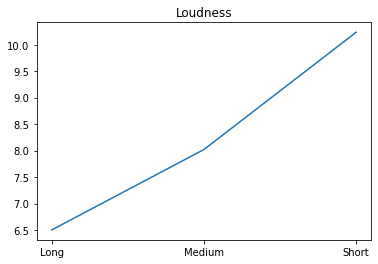

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting the loudness
features['posLoudness'] = [-x for x in features['Loudness']]
plt.plot(features['posLoudness'])
plt.title('Loudness')

Text(0.5, 1.0, 'Danceability')

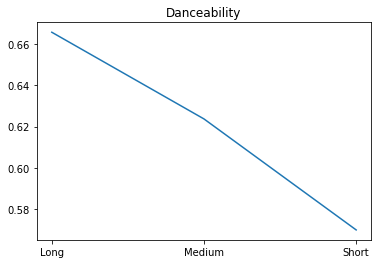

In [38]:
plt.plot(features['Danceability'])
plt.title('Danceability')

[]

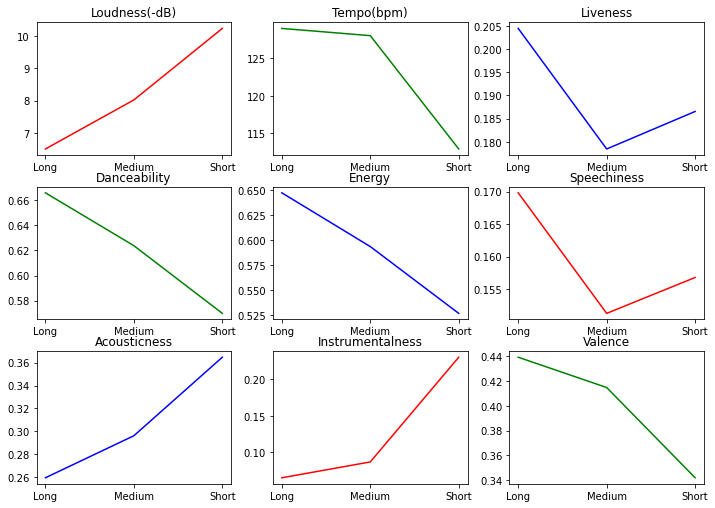

In [39]:
# plotting all the features together!
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,7))
plt.tight_layout()
axes[0][0].plot(features['posLoudness'], color='red')
axes[0][0].set_title('Loudness(-dB)')
axes[0][1].plot(features['Tempo'], color='green')
axes[0][1].set_title('Tempo(bpm)')
axes[0][2].plot(features['Liveness'], color='blue')
axes[0][2].set_title('Liveness')
axes[1][0].plot(features['Danceability'], color='green')
axes[1][0].set_title('Danceability')
axes[1][1].plot(features['Energy'], color='blue')
axes[1][1].set_title('Energy')
axes[1][2].plot(features['Speechiness'], color='red')
axes[1][2].set_title('Speechiness')
axes[2][0].plot(features['Acousticness'], color='blue')
axes[2][0].set_title('Acousticness')
axes[2][1].plot(features['Instrumentalness'], color='red')
axes[2][1].set_title('Instrumentalness')
axes[2][2].plot(features['Valence'], color='green')
axes[2][2].set_title('Valence')

plt.plot()